## Exercises: 
#### - Change the number of clusters to 4 and plot the dendrogram again. 
#### - Try different hierarchical clustering methods such as 'single,' 'complete,' or 'average' and observe the differences in the dendrograms. Use the hierarchy documentation: 
https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html

In [5]:
def import_csv(file_path):
    """Imports a CSV file and returns a pandas DataFrame."""
    return pd.read_csv(file_path)
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib import colormaps

# Path to the file to be imported
path = "Terminos_lagoon_TA_DIC_2023_RawData.csv"

# Import the file
CO2Data = import_csv(path)

In [8]:
def preprocess_data(df, variables):
    """
    Standardize selected variables and return clean DataFrame.
    """
    df_clean = df.dropna(subset=variables)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clean[variables])
    return df_clean, X_scaled

In [9]:
def perform_hierarchical_clustering(X_scaled, method='ward', n_clusters=3):
    """
    Perform hierarchical clustering and return cluster labels.
    """
    linkage_matrix = linkage(X_scaled, method=method)
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')
    return linkage_matrix, cluster_labels

In [10]:

def plot_dendrogram(linkage_matrix, labels=None, n_clusters=4):
    """
    Plot a dendrogram from the hierarchical clustering with sample labels.
    Annotate the plot with the number of clusters.
    """
    # Generate cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    plt.figure(figsize=(10, 5))
    dendrogram(
        linkage_matrix,
        labels=labels,
        above_threshold_color='gray'  # Default color for links above the threshold
    )
    plt.title(f'Hierarchical Clustering Dendrogram\n(Number of Clusters: {n_clusters})')
    plt.xlabel('Sample Labels')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()



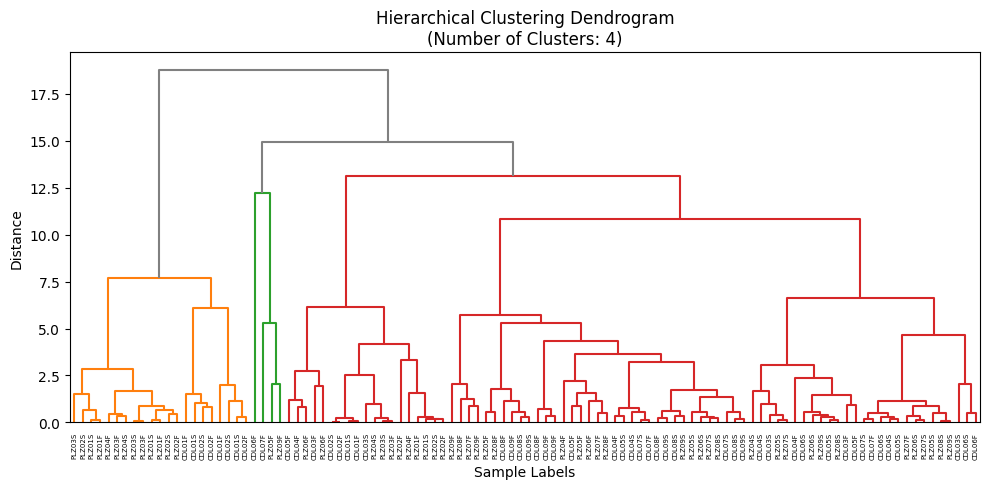

In [11]:
# Main workflow

# Select variables for clustering
selected_vars = ['dic_micromol_kg', 'ta_micromol_kg', 'sal_psu', 'temp_c', 'do_mg_l', 'chlorophy_microg_l','turbidity_fnu']

# Preprocess the data;  Drop rows with missing values in selected variables
# Standardize the selected variables using StandardScaler
df_clean, X_scaled = preprocess_data(CO2Data, selected_vars)

# Perform hierarchical clustering sing thue 'ward' method 
# The number of clusters to be 3,  You can adjust the number of clusters as needed
linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, n_clusters=3)
 
# Add cluster labels to the DataFrame
df_clean['cluster'] = clusters

# Plot dendrogram using sample labels 
plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values)

## Se hace el ajuste para realizar el ejercicio.


Método: WARD


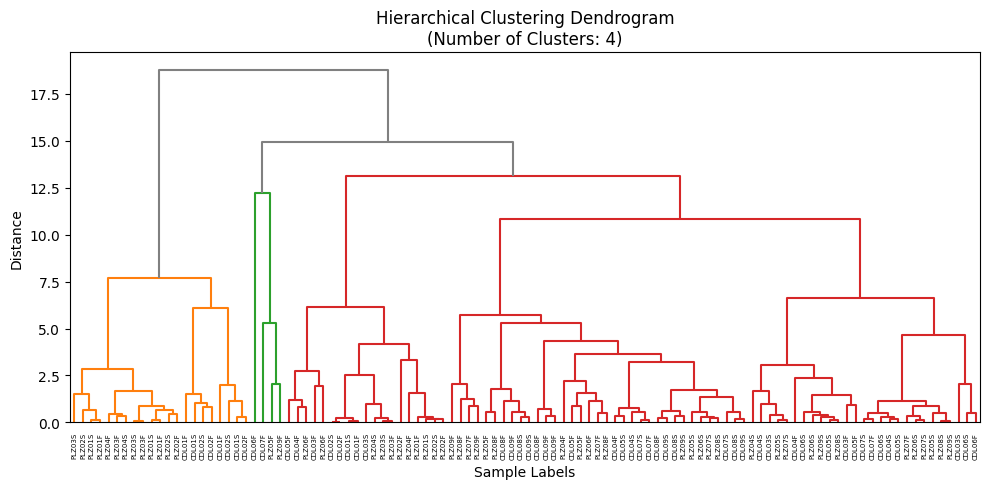


Método: SINGLE


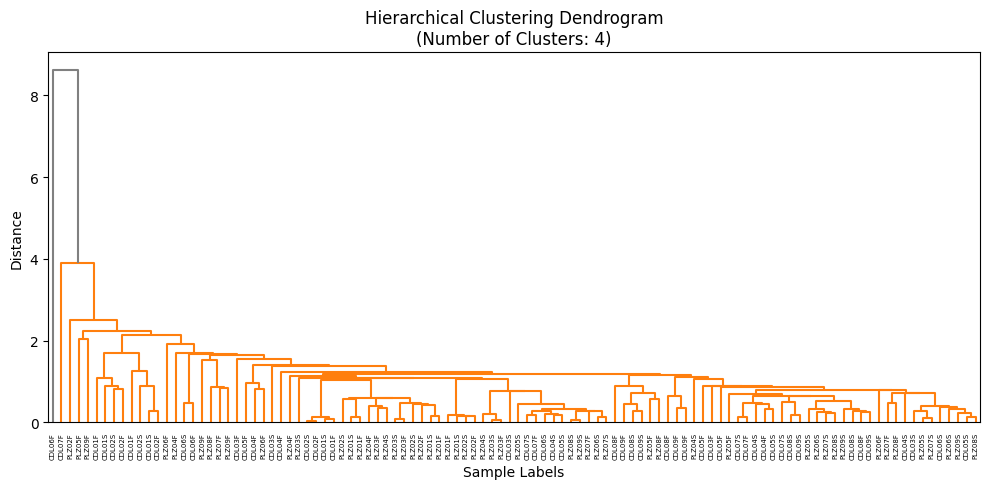


Método: COMPLETE


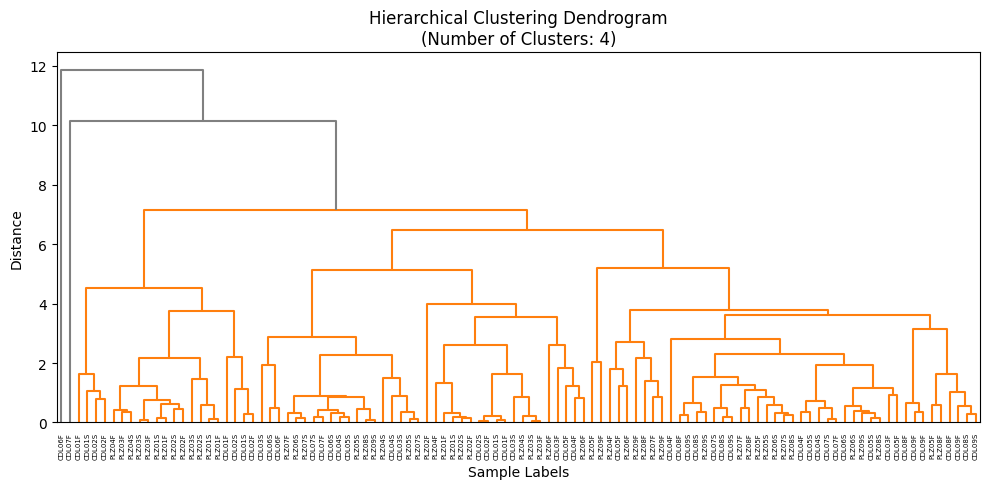


Método: AVERAGE


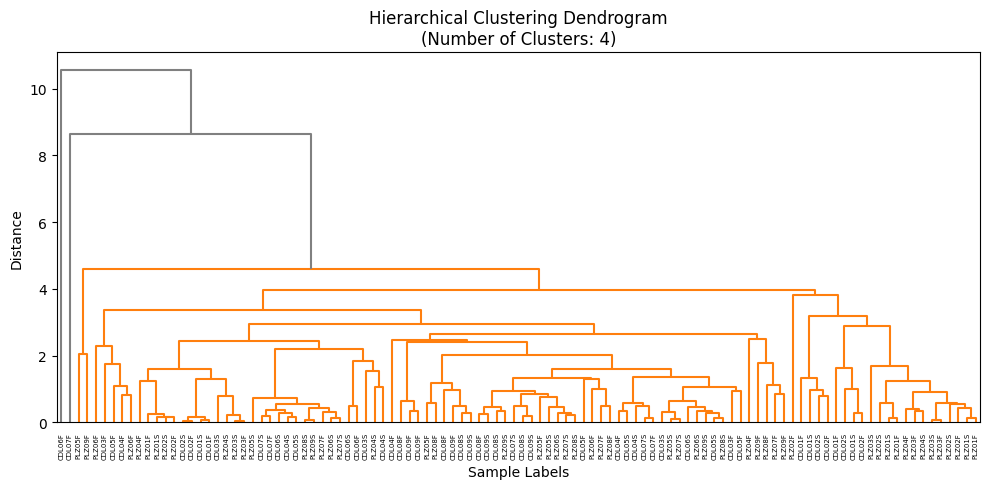

In [13]:
for method in ['ward', 'single', 'complete', 'average']:
    print(f"\nMétodo: {method.upper()}")
    linkage_matrix, clusters = perform_hierarchical_clustering(X_scaled, method=method, n_clusters=4)
    df_clean[f'cluster_{method}'] = clusters
    plot_dendrogram(linkage_matrix, labels=df_clean['sample'].values, n_clusters=4)